In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
import numpy as np

x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

x1 = tf.constant(x)
x1 = tf.reshape(x1, (-1, 1))
y1 = tf.constant(y)
y1 = tf.reshape(y1, (-1, 1))
x1,y1


(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]])>)

## Steps in modelling
1. **creating a model** - define input, output and hidden layers
2. **compiling a model** - define the loss function (tells model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model**- letting the model try to find patterns between x and y (features and labels)

In [3]:
#set random seed
tf.random.set_seed(42)

#1. Create model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = None),
    tf.keras.layers.Dense(100, activation = None),
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.01), #stochastic gradient descent
              metrics=["mae"])
#3. Fit the model
model.fit(x1, y1, epochs=5)

Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 14.5127 - mae: 14.5127
Epoch 2/5
1/1 [==============================] - 0s 28ms/step - loss: 14.2536 - mae: 14.2536
Epoch 3/5
1/1 [==============================] - 0s 39ms/step - loss: 13.9948 - mae: 13.9948
Epoch 4/5
1/1 [==============================] - 0s 38ms/step - loss: 13.7361 - mae: 13.7361
Epoch 5/5
1/1 [==============================] - 0s 38ms/step - loss: 13.4773 - mae: 13.4773


In [4]:
model.predict([17.0]),model.predict([14.0])

1/1 [==============================] - 0s 235ms/step


(array([[1.0726192]], dtype=float32), array([[0.89682]], dtype=float32))

## Improving our model
we can improve our model by altering the steps we took to create our model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more training or more data

In [5]:
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [6]:
y= x+ 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [7]:
x_train = x[:40]
y_train= y[:40]

x_test = x[40:]
y_test = y[40:]

In [19]:
#set random seed
tf.random.set_seed(42)

#1. Create model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer" )


], name="model_1")


#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#3. Fit the model
model.fit(x_train,y_train,epochs=100, verbose=0)

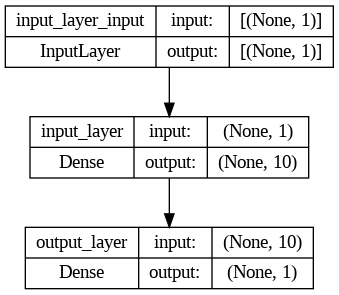

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes= True)

In [11]:
y_pred = model.predict(x_test)
y_pred, y_test

1/1 [==============================] - 0s 170ms/step


(array([[ 76.99578 ],
        [ 82.01621 ],
        [ 87.036644],
        [ 92.05706 ],
        [ 97.07751 ],
        [102.09793 ],
        [107.118355],
        [112.13879 ],
        [117.15922 ],
        [122.17965 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

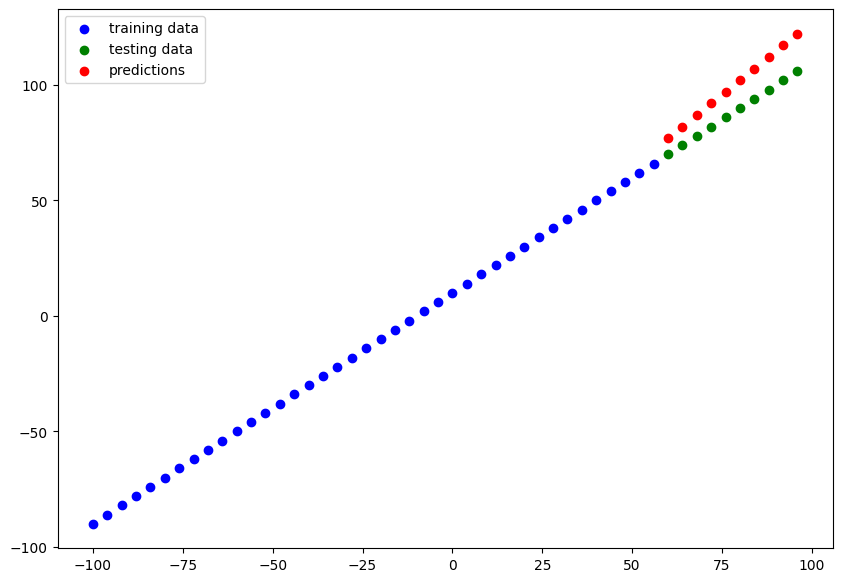

In [12]:
import matplotlib.pyplot as plt

#create pllotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data= x_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c ="b", label="training data")
  plt.scatter(test_data, test_labels, c ="g", label="testing data")
  plt.scatter(test_data, predictions, c= "r", label= "predictions")
  plt.legend();

plot_predictions()


In [13]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

## Adjusting to make best possible model

In [21]:
#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])
#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#3 Fit the model
model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0247 - mae: 9.0247
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4069 - mae: 9.4069
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 7.6309 - mae: 7.6309
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 9.6620 - mae: 9.6620
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0931 - mae: 11.0931
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2435 - mae: 10.2435
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2492 - mae: 9.2492
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1650 - mae: 9.1650
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8040 - mae: 11.8040
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 13.7368 - mae: 13.7368
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - los

1/1 [==============================] - 0s 66ms/step


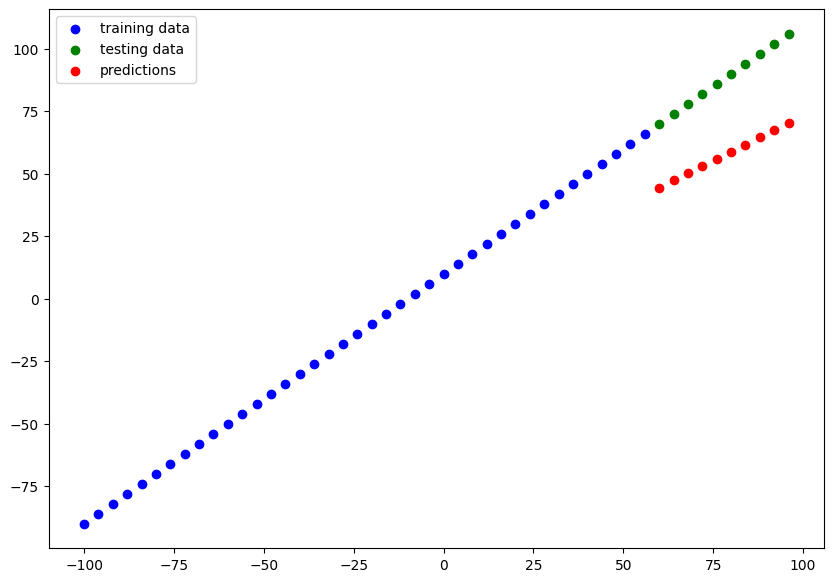

In [15]:
y_preds1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds1)

In [16]:
mae1 = mae(y_test, y_preds1)
mse1 = mse(y_test, y_preds1)
mae1,mse1


(<tf.Tensor: shape=(), dtype=float32, numpy=30.622961>,
 <tf.Tensor: shape=(), dtype=float32, numpy=948.2035>)

## model 2

In [24]:

x_train = x_train.numpy().reshape((x_train.shape[0], 1))

In [25]:
#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
#3 Fit the model
model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 55.7433 - mse: 4876.4819
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 30.0935 - mse: 1189.6438
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 34.8153 - mse: 1833.9050
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 28.9907 - mse: 1242.3529
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.7091 - mse: 321.3885
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4547 - mse: 199.0750
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.7233 - mse: 169.2069
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 12.0980 - mse: 201.4632
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 37.9345 - mse: 2221.6458
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.5322 - mse: 915.2230
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 54ms/step


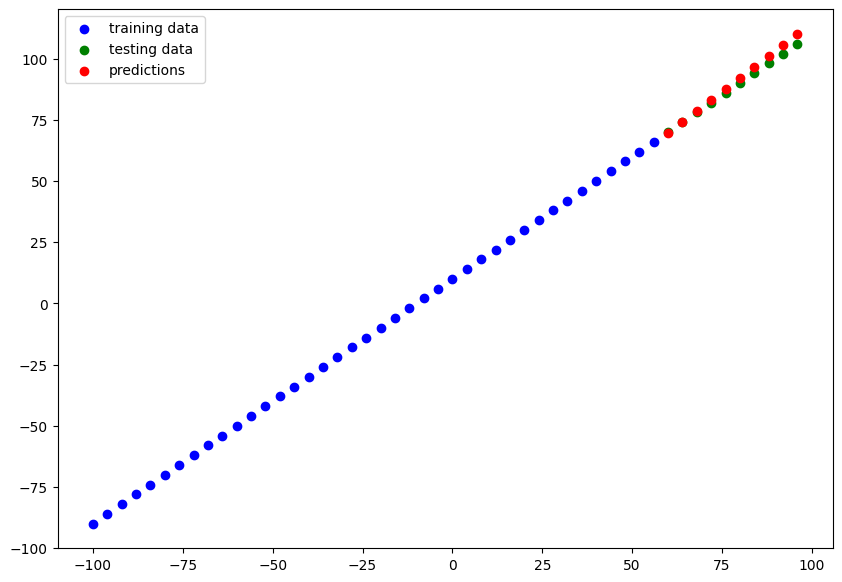

In [27]:
y_preds2= model_2.predict(x_test)
plot_predictions(predictions=y_preds2)

In [28]:
mae2 = mae(y_test, y_preds2)
mse2 = mse(y_test, y_preds2)
mae2,mse2


(<tf.Tensor: shape=(), dtype=float32, numpy=1.8937485>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.3667603>)

##Model 3

In [32]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

model3.compile(loss= tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
model3.fit(x_train, y_train, epochs=500)


Epoch 1/500
2/2 [==============================] - 2s 11ms/step - loss: 59.7462 - mae: 59.7462
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 30.6216 - mae: 30.6216
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 33.7549 - mae: 33.7549
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 17.6392 - mae: 17.6392
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 23.4284 - mae: 23.4284
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.3830 - mae: 11.3830
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 12.4837 - mae: 12.4837
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0866 - mae: 11.0866
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 39.7204 - mae: 39.7204
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 27.2116 - mae: 27.2116
Epoch 11/500
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 63ms/step


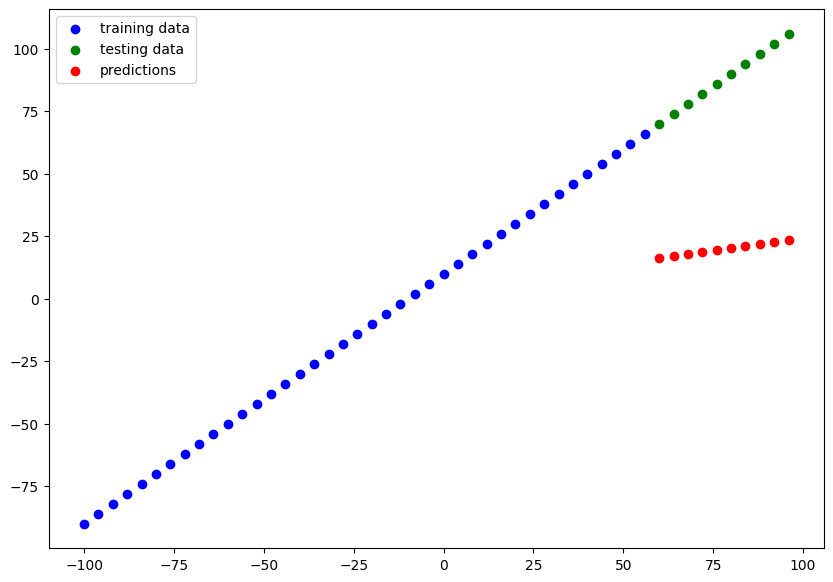

In [33]:
y_preds3= model3.predict(x_test)
plot_predictions(predictions=y_preds3)

# saving models

In [36]:
model_2.save("best_Model")
model_2.save("best_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in saved model

In [39]:
loaded_savedModel_format = tf.keras.models.load_model("/content/best_Model")
loaded_savedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
loaded_savedModel_format.predict(x_test)

1/1 [==============================] - 0s 259ms/step


array([[ 69.46452 ],
       [ 73.979645],
       [ 78.494774],
       [ 83.009895],
       [ 87.525024],
       [ 92.040146],
       [ 96.55527 ],
       [101.07039 ],
       [105.58551 ],
       [110.10065 ]], dtype=float32)

# More Complex Example


In [44]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [47]:
insurance_one_hot =pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [52]:
x = insurance_one_hot.drop("charges", axis= 1)
y = insurance_one_hot["charges"]

In [49]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [53]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [55]:
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [67]:
from inspect import ismodule
#Set random seed
tf.random.set_seed(42)

#1. Create the model
imodel = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2. Compile the model
imodel.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
#3 Fit the model
history = imodel.fit(x_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 9ms/step - loss: 13307.9121 - mae: 13307.9121
Epoch 2/200
34/34 [==============================] - 1s 16ms/step - loss: 13172.1123 - mae: 13172.1123
Epoch 3/200
34/34 [==============================] - 0s 10ms/step - loss: 12887.3359 - mae: 12887.3359
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 12304.7676 - mae: 12304.7676
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11277.0869 - mae: 11277.0869
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9855.3057 - mae: 9855.3057
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8430.3105 - mae: 8430.3105
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7613.9951 - mae: 7613.9951
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7449.8989 - mae: 7449.8989
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7426.9487 - ma

In [66]:
imodel.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.9819 - mae: 3488.9819


[3488.98193359375, 3488.98193359375]

Text(0.5, 0, 'epochs')

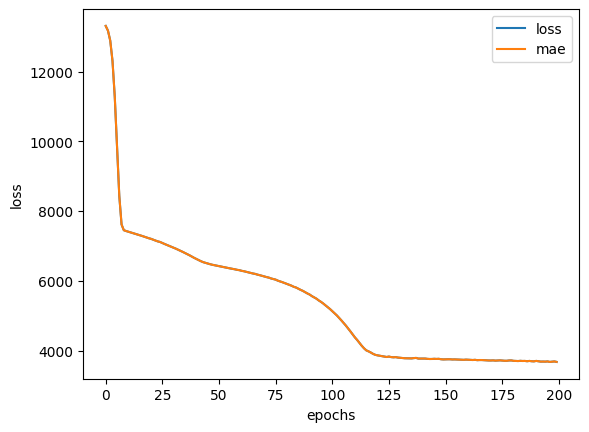

In [69]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Using normaliztion

In [71]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker","region"])
)



In [74]:
x = insurance.drop("charges", axis =1 )
y = insurance["charges"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [75]:
#fit column transfromer, have to do this seperatelty since you
# do not want to use info from test data in the scaling of train data,
# thats like taking information from the future.

ct.fit(x_train)# seeing the scale?

x_train_normalized = ct.transform(x_train)#applying the scale?
x_test_normlaized =ct.transform(x_test)#applying the scale?



In [79]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [80]:
x_train_normalized[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [82]:
x_train.shape, x_train_normalized.shape

((1070, 6), (1070, 11))

In [83]:
#new model for normalized data

tf.random.set_seed(42)

insurance_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])
insurance_model4.fit(x_train_normalized, y_train, epochs=100)



Epoch 1/100
34/34 [==============================] - 2s 6ms/step - loss: 13343.1982 - mae: 13343.1982
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13333.7637 - mae: 13333.7637
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13310.4121 - mae: 13310.4121
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13262.1748 - mae: 13262.1748
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13177.8633 - mae: 13177.8633
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13046.8525 - mae: 13046.8525
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12858.9443 - mae: 12858.9443
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12604.0488 - mae: 12604.0488
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12272.0879 - mae: 12272.0879
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11861.07

In [84]:
insurance_model4.evaluate(x_test_normlaized, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3436.8933 - mae: 3436.8933


[3436.893310546875, 3436.893310546875]